In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('Salary_Data.csv')

EDA

In [4]:
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [3]:
data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [5]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
data.isnull().any()

YearsExperience    False
Salary             False
dtype: bool

In [7]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [8]:
data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool

In [9]:
missing_percentage = (data.isnull().sum() / len(data)) * 100

print(missing_percentage)



YearsExperience    0.0
Salary             0.0
dtype: float64


In [10]:
data.duplicated().sum()


np.int64(0)

In [11]:
data.shape

(30, 2)

outlier detection

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
#any outliers
data.skew()

YearsExperience    0.37956
Salary             0.35412
dtype: float64

<Axes: ylabel='Salary'>

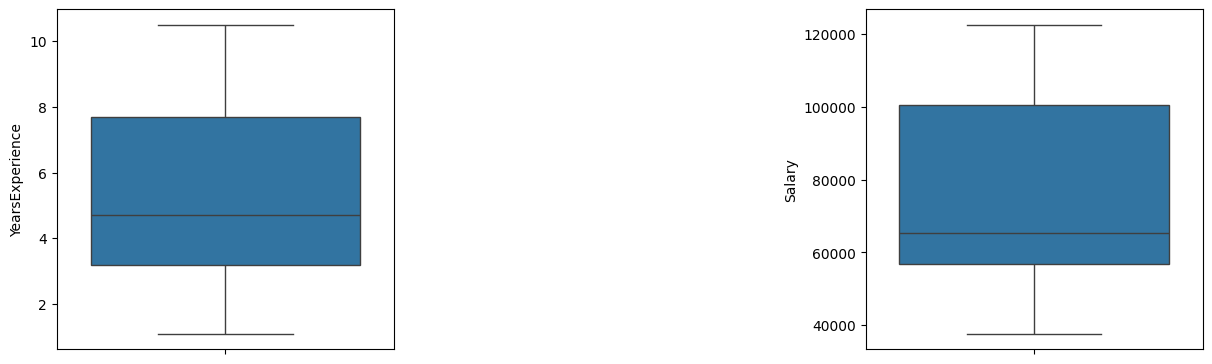

In [15]:
plt.figure(figsize=(20,15))
plt.subplot(3,4,2)
sns.boxplot(data['YearsExperience'])

plt.subplot(3,4,4)
sns.boxplot(data['Salary'])


In [16]:
data.kurt()

YearsExperience   -1.012212
Salary            -1.295421
dtype: float64

In [17]:
data[['YearsExperience','Salary']].cov()

,YearsExperience,Salary
YearsExperience,8.053609,7.610630e+04
Salary,76106.303448,7.515510e+08


In [18]:
#check any correlation and covariance
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


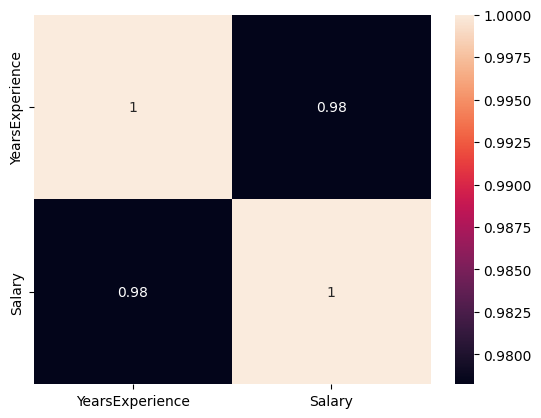

In [19]:
sns.heatmap(data.corr(),annot=True)
plt.show()

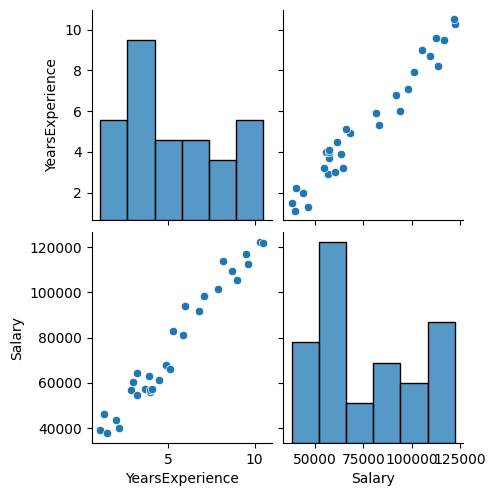

In [20]:
sns.pairplot(data)
plt.show()

Dependent And Independent Variables

In [21]:
X=data.drop('Salary',axis=1)

In [22]:
y=data.Salary

In [23]:
X.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [24]:
y.head()

0    39343
1    46205
2    37731
3    43525
4    39891
Name: Salary, dtype: int64

Splitting The Data

In [25]:

from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [58]:
print(X_train.shape)

(21, 1)


Regression Model

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Prediction

In [61]:
y_pred = model.predict(X_test)

In [62]:
print('Actual value:',y_test)
print('Predicted Response:',y_pred)

Actual value: 2      37731
28    122391
13     57081
10     63218
26    116969
24    109431
27    112635
11     55794
17     83088
Name: Salary, dtype: int64
Predicted Response: [ 40817.78327049 123188.08258899  65154.46261459  63282.41035735
 115699.87356004 108211.66453108 116635.89968866  64218.43648597
  76386.77615802]


In [63]:
r_squared = model.score(X_test, y_test)

In [64]:
print(f"Coefficient of determination: {r_squared}")

Coefficient of determination: 0.9740993407213511


In [65]:
print('Intercept:',model.intercept_)

Intercept: 26777.391341197625


In [66]:
print('slope:',model.coef_)

slope: [9360.26128619]


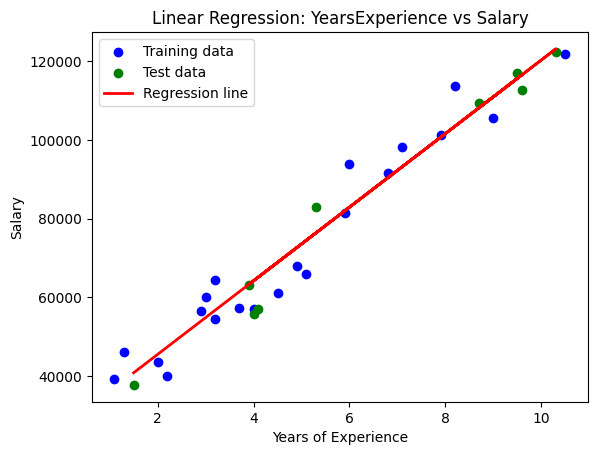

In [67]:
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='green', label='Test data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression line')
plt.title('Linear Regression: YearsExperience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()